# Code by- Vikash Sahni
## Bank Personal Loan Classification Model using Logistic Regression

In [77]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv")

In [79]:
df.shape

(5000, 14)

In [80]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [81]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [82]:
df.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
Personal Loan         False
dtype: bool

In [83]:
x = df.drop(columns = ["ID","ZIP Code","Personal Loan"], axis =  1)
x.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [84]:
y = df["Personal Loan"]
y.value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [85]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(x)
x = standardized_data
x

array([[-1.77441684, -1.66607847, -0.53822878, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.02952359, -0.09633022, -0.8641094 , ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.55299157, -0.44516316, -1.36379301, ..., -0.25354028,
        -1.21661774, -0.64531434],
       ...,
       [ 1.54088033,  1.64783451, -1.08136314, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [ 1.71536965,  1.73504275, -0.53822878, ..., -0.25354028,
         0.82195086, -0.64531434],
       [-1.51268285, -1.40445376,  0.20043396, ..., -0.25354028,
         0.82195086,  1.54963239]])

In [86]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = .2, stratify = y, random_state = 1)
print(x.shape, xtrain.shape, xtest.shape)

(5000, 11) (4000, 11) (1000, 11)


In [87]:
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
prediction = model.predict(xtest)

In [89]:
accuracy_score = accuracy_score(ytest,prediction)
accuracy_score

0.945

In [90]:
from sklearn import metrics
print(metrics.classification_report(ytest,prediction))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       904
           1       0.80      0.57      0.67        96

    accuracy                           0.94      1000
   macro avg       0.88      0.78      0.82      1000
weighted avg       0.94      0.94      0.94      1000



In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,prediction)

array([[890,  14],
       [ 41,  55]])

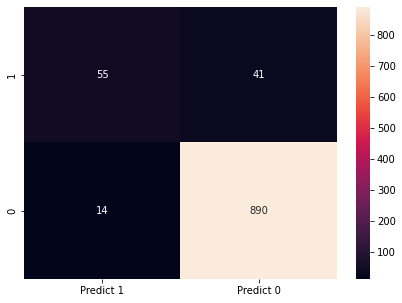

In [92]:
cm = metrics.confusion_matrix(ytest, prediction, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                    columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt="g")